In [13]:
import sys
sys.path.append("..")
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
os.environ["PATH"] += os.pathsep + "/Library/TeX/texbin"
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["cm"],
    "axes.labelsize": 18,
    "axes.titlesize": 20,
    "legend.fontsize": 14,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "text.latex.preamble": r"\usepackage{amsmath, amssymb}",
})

In [4]:
%load_ext autoreload
%autoreload 2
from benchmarks.evaluator.oneshot import Evaluator
from benchmarks.evaluator.utils import plot_success_bars
from benchmarks.prompts.camb import get_prompts

In [5]:
df = get_prompts(reintial=False)

In [6]:
workdir = "/Users/antoidicherianlonappan/Workspace/cmbagent_output/evals"

In [7]:
Ee4o = Evaluator(workdir,agent='engineer', model='gpt-4o', trials=10)
Ee41 = Evaluator(workdir,agent='engineer', model='gpt-4.1', trials=10)
Eeg = Evaluator(workdir,agent='engineer', model='gemini-2.5-pro-preview-03-25', trials=10)
Ecc = Evaluator(workdir,agent='camb_context', model='', trials=10)

In [8]:
Ee4o(df)
Ee41(df)
Eeg(df)
Ecc(df)

creating reference answers for prompts: 100%|██████████| 14/14 [00:00<00:00, 14371.09it/s]


In [9]:
#Eeg.run_all()


In [10]:
#results = E.run_all()

/Users/antoidicherianlonappan/Workspace/Benchmarks/examples/../benchmarks/evaluator/oneshot.py:228: FutureWarning: The 'special_case=True' option will be removed in a future version.
  result = self.success_prompt(idx, special_case=special_case)
<string>:25: UserWarning: loadtxt: input contained no data: "/Users/antoidicherianlonappan/Workspace/cmbagent_output/evals/prompt_engineergemini-2.5-pro-preview-03-25_2/trial_2/data/result.csv"
<string>:25: UserWarning: loadtxt: input contained no data: "/Users/antoidicherianlonappan/Workspace/cmbagent_output/evals/prompt_engineergemini-2.5-pro-preview-03-25_2/trial_3/data/result.csv"
<string>:25: UserWarning: loadtxt: input contained no data: "/Users/antoidicherianlonappan/Workspace/cmbagent_output/evals/prompt_engineergemini-2.5-pro-preview-03-25_2/trial_6/data/result.csv"


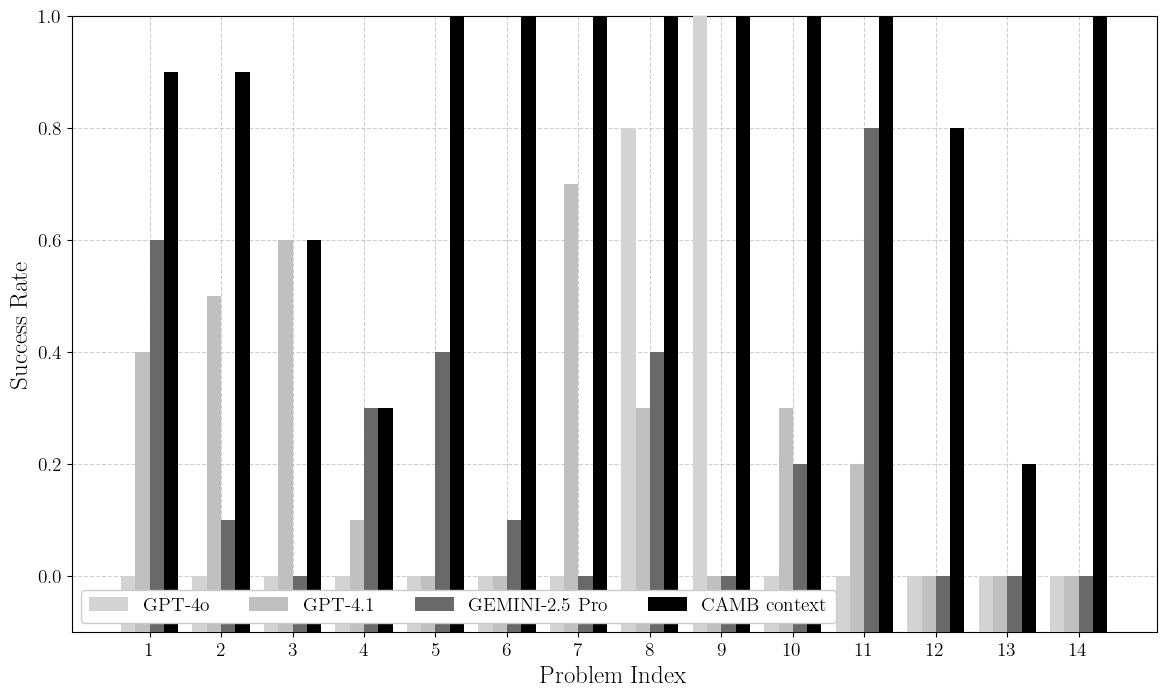

In [39]:
scores = [Ee4o.success_all(), Ee41.success_all(), Eeg.success_all(), Ecc.success_all()]
plot_success_bars(scores, ['GPT-4o', 'GPT-4.1', 'GEMINI-2.5 Pro', 'CAMB context'], ['lightgrey','silver','dimgrey','k'],width=0.2,figsize=(14,8),save='camb_success.pdf')

In [17]:
data = {
    'GPT-4o': np.array(Ee4o.success_all()),
    'GPT-4.1': np.array(Ee41.success_all()),
    'GEMINI-2.5 Pro': np.array(Eeg.success_all()),
    'CAMB context': np.array(Ecc.success_all())
}

/Users/antoidicherianlonappan/Workspace/Benchmarks/examples/../benchmarks/evaluator/oneshot.py:232: FutureWarning: The 'special_case=True' option will be removed in a future version.
  result = self.success_prompt(idx, special_case=special_case)
/Users/antoidicherianlonappan/Workspace/Benchmarks/examples/../benchmarks/evaluator/oneshot.py:204: UserWarning: loadtxt: input contained no data: "/Users/antoidicherianlonappan/Workspace/cmbagent_output/evals/prompt_engineergemini-2.5-pro-preview-03-25_2/trial_2/data/result.csv"
  x_llm, y_llm = np.loadtxt(resultfile, delimiter=',', skiprows=1).T
/Users/antoidicherianlonappan/Workspace/Benchmarks/examples/../benchmarks/evaluator/oneshot.py:204: UserWarning: loadtxt: input contained no data: "/Users/antoidicherianlonappan/Workspace/cmbagent_output/evals/prompt_engineergemini-2.5-pro-preview-03-25_2/trial_3/data/result.csv"
  x_llm, y_llm = np.loadtxt(resultfile, delimiter=',', skiprows=1).T
/Users/antoidicherianlonappan/Workspace/Benchmarks/exa

In [18]:
data

{'GPT-4o': array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 1. , 0. , 0. , 0. , 0. ,
        0. ]),
 'GPT-4.1': array([0.4, 0.5, 0.6, 0.1, 0. , 0. , 0.7, 0.3, 0. , 0.3, 0.2, 0. , 0. ,
        0. ]),
 'GEMINI-2.5 Pro': array([0.6, 0.1, 0. , 0.3, 0.4, 0.1, 0. , 0.4, 0. , 0.2, 0.8, 0. , 0. ,
        0. ]),
 'CAMB context': array([0.9, 0.9, 0.6, 0.3, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.8, 0.2,
        1. ])}

In [20]:
data_serializable = {k: v.tolist() for k, v in data.items()}

In [21]:
data_serializable

{'GPT-4o': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.8,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'GPT-4.1': [0.4,
  0.5,
  0.6,
  0.1,
  0.0,
  0.0,
  0.7,
  0.3,
  0.0,
  0.3,
  0.2,
  0.0,
  0.0,
  0.0],
 'GEMINI-2.5 Pro': [0.6,
  0.1,
  0.0,
  0.3,
  0.4,
  0.1,
  0.0,
  0.4,
  0.0,
  0.2,
  0.8,
  0.0,
  0.0,
  0.0],
 'CAMB context': [0.9,
  0.9,
  0.6,
  0.3,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.8,
  0.2,
  1.0]}

In [22]:
import json
with open('camb_success.json', 'w') as f:
    json.dump(data_serializable, f, indent=4)